In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np

In [3]:
# Reading file as a csv file format
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# get to know how many r,c you're dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Notice that the `total_bedrooms` column contains 20_433 non null values, which means that there's a missing 207 values

In [5]:
df.describe().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [6]:
numcols = df.select_dtypes(include=['int', 'float'])
catcols = df.select_dtypes(include='object')

In [7]:
# Importing visualization library (using plotly, matplotlib library)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
for num in numcols:
    px.histogram(data_frame=numcols, x=num).show()

In [9]:
# split the data into train and test data with importing necessary libraries
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf],
                           labels=[1, 2, 3, 4, 5])
df["income_cat"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

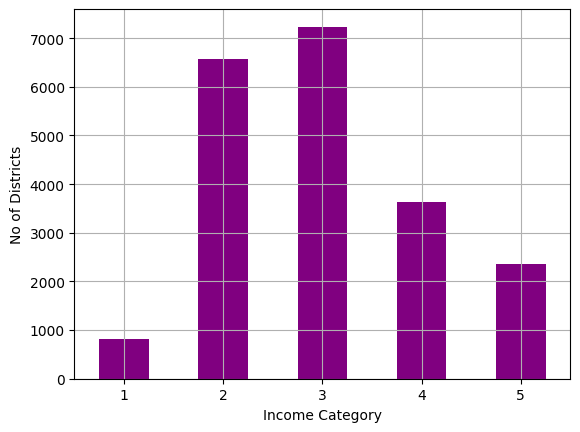

In [11]:
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True, color="purple")
plt.xlabel("Income Category")
plt.ylabel("No of Districts")
plt.show()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_split = []

for train_index, test_index in splitter.split(df, df["income_cat"]):
    strat_train_set_n = df.iloc[train_index]
    strat_test_set_n = df.iloc[test_index]
    strat_split.append([strat_test_set_n, strat_test_set_n])    

In [13]:
strat_train_set, strat_test_set = strat_split[0]

In [14]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
# Compare income category portions in the dataset
for set in (strat_train_set, strat_test_set):
    train_test_split(df, test_size=0.2, stratify=df["income_cat"], random_state=42)

In [16]:
strat_test_set["income_cat"].value_counts() /len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

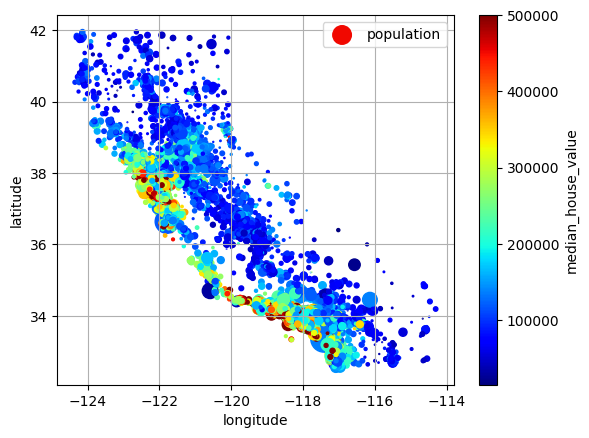

In [17]:
# Plotting the longitude and latitude to see which state is this
df.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=df["population"]/100, label="population", c='median_house_value', cmap='jet', colorbar=True,
        legend=True, sharex=False)
plt.show()
# It's California

In [18]:
# seeing the correlation coefficient in the data using the corr() method
corrdf = df.corr(numeric_only=True)
corrdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [19]:
attributes = ["housing_median_age", "total_rooms", "median_income", "median_house_value"]

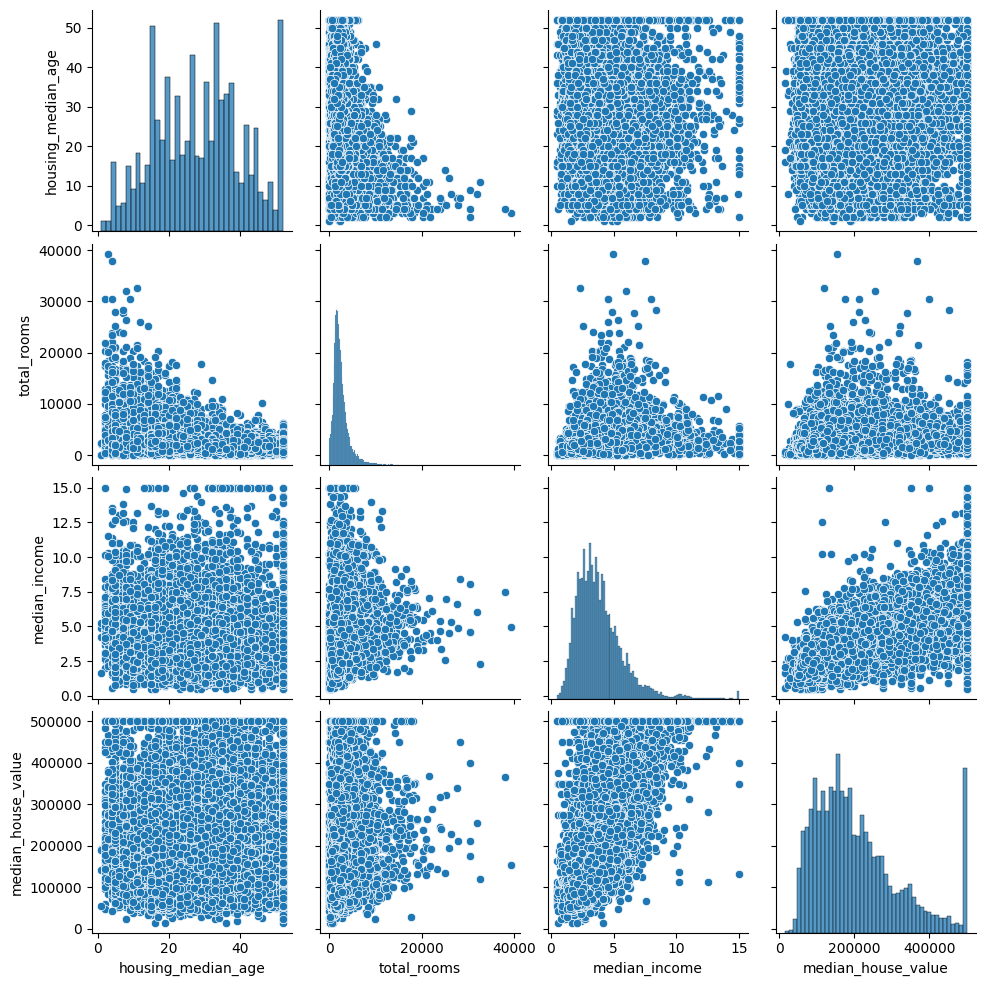

In [20]:
sns.pairplot(data=df[attributes])

<Axes: xlabel='median_income', ylabel='median_house_value'>

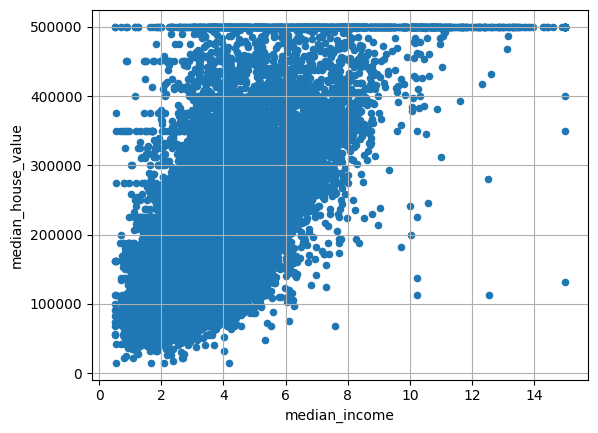

In [21]:
# Looking at the data above, we find that the best attribute to predict the median house value is the median income

df.plot(kind="scatter", x='median_income', y='median_house_value', grid=True)

In [22]:
# Creating a new column to determine the rooms per house
df["rooms_per_house"] = df["total_rooms"] / df["households"]

In [23]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat',
       'rooms_per_house'],
      dtype='object')

In [24]:
# Creating a new column to determine the bedrooms ratio
df["bedrooms_ratio"] = df["total_bedrooms"] / df["total_rooms"]

In [25]:
# Creating a new column to determine how many people per house
df["people_per_house"] = df["population"] / df["households"]

In [26]:
new_corrdf = df.corr(numeric_only=True)
new_corrdf
# The new column 'bedrooms_ratio' more correlated to the median_house_value column than the number of rooms or bedrooms

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_house,bedrooms_ratio,people_per_house
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_house,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


#### We conclude that houses with fewer bedroom/room ratio tend to be more expensive

In [27]:
df = strat_train_set.drop("median_house_value", axis=1)
house_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

In [28]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
7434,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND,4
2186,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,<1H OCEAN,4
15297,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,<1H OCEAN,5
3111,-117.14,32.71,52.0,500.0,NaN,480.0,108.0,1.8696,NEAR OCEAN,2
6407,-117.27,32.85,26.0,1373.0,NaN,608.0,268.0,4.4250,NEAR OCEAN,3


In [29]:
housing_option1 = df.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [30]:
housing_option2 = df.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
7434,-117.73,34.10,37.0,3457.0,1344.0,530.0,5.8891,INLAND,4
2186,-118.72,34.28,17.0,3051.0,1705.0,495.0,5.7376,<1H OCEAN,4
15297,-118.23,34.18,45.0,2332.0,943.0,339.0,8.1132,<1H OCEAN,5
3111,-117.14,32.71,52.0,500.0,480.0,108.0,1.8696,NEAR OCEAN,2
6407,-117.27,32.85,26.0,1373.0,608.0,268.0,4.4250,NEAR OCEAN,3


In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [32]:
housing_num = df.select_dtypes(include=[np.number])

In [33]:
imputer.fit(housing_num)

,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [34]:
housing_num.median().values

array([-118.46  ,   34.23  ,   29.    , 2137.5   ,  438.    , 1163.    ,
        412.5   ,    3.5269])

In [35]:
X = imputer.transform(housing_num)

In [36]:
# Categorical Colimns
housing_cat = df[["ocean_proximity"]]
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          1862
INLAND             1250
NEAR OCEAN          569
NEAR BAY            444
ISLAND                3
Name: count, dtype: int64

In [37]:
# Converting the column above into a numerical array
from sklearn.preprocessing import OrdinalEncoder

OE = OrdinalEncoder()
housing_cat_encoded = OE.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[0.],
       [0.],
       [4.],
       [4.],
       [3.],
       [0.],
       [3.],
       [0.]])

In [38]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], shape=(4128, 5))

In [39]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], shape=(4128, 5))

In [40]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [41]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [42]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [43]:
df_test_uk = pd.DataFrame({"ocean_proximity": ["<2 OCEAN", "NEAR BAY"]})
pd.get_dummies(df_test_uk)

,ocean_proximity_<2 OCEAN,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [44]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_uk)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [45]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [46]:
df_out = pd.DataFrame(cat_encoder.transform(df_test_uk), columns=cat_encoder.get_feature_names_out(), index=df_test_uk.index)

In [47]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [48]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [49]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [50]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [51]:
from sklearn.metrics.pairwise import rbf_kernel

age_similarity_35 = rbf_kernel(df[["housing_median_age"]], [[35]], gamma=0.1)

In [52]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(house_labels.to_frame())

model = LinearRegression()
model.fit(df[["median_income"]], scaled_labels)
some_new_data = df[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [53]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(df[["median_income"]], house_labels)
predictions = model.predict(some_new_data)
predictions

array([368028.43683939, 240386.50255989, 218214.03729416, 219621.943555  ,
       197914.66369124])

In [54]:
# Without random_state: different result every time
print(np.random.rand(3))

# With random_state=42: same result every time
np.random.seed(60)
print(np.random.rand(3))

[0.66379722 0.04419886 0.76917327]
[0.30087333 0.18694582 0.32318268]


In [57]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(house_labels.to_frame())

model = LinearRegression()
model.fit(df[["median_income"]], scaled_labels)
some_new_data = df[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [58]:
predictions

array([[368028.43683939],
       [240386.50255989],
       [218214.03729416],
       [219621.943555  ],
       [197914.66369124]])

In [61]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(df[["median_income"]], house_labels)
predictions = model.predict(some_new_data)
predictions

array([368028.43683939, 240386.50255989, 218214.03729416, 219621.943555  ,
       197914.66369124])

In [63]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(df[["population"]])
log_pop

,population
3905,6.816736
16821,6.689599
2900,7.666690
7193,6.977281
13928,6.586172
...,...
12369,7.095064
8707,7.033506
16634,5.976351
9779,7.305188


In [ ]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35]], gamma=0.1))
age_similarity_35 = rbf_transformer.transform(df[["housing_median_age"]])

array([[3.07487988e-09],
       [9.04837418e-01],
       [8.20849986e-02],
       ...,
       [6.70320046e-01],
       [5.55951324e-06],
       [2.81118530e-13]], shape=(4128, 1))

In [67]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(df[["latitude", "longitude"]])
sf_simil

array([[0.93672156],
       [0.03189695],
       [0.03279983],
       ...,
       [0.89036802],
       [0.98265322],
       [0.00482747]], shape=(4128, 1))

In [68]:
ratio_transformer = FunctionTransformer(lambda X:X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1, 2], [3, 4]]))

array([[0.5 ],
       [0.75]])

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean
    
    def fit(self, X, y=None):
        X = check_array(X)
        self.mean = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]
        return self
    
    def transform(self, X):
        check_is_fitted(self)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X-self.mean_
        return X / self.scale_

In [71]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]